In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
from pylab import rcParams
import seaborn as sns
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
sns.set(style="darkgrid")
from sklearn.model_selection import train_test_split, KFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
import nltk
import re
import unicodedata
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import string
nltk.download('stopwords')
nltk.download('punkt')
stopwords_ = set(stopwords.words('english'))
punctuation_ = set(string.punctuation)

from nltk.stem.snowball import SnowballStemmer
stemmer_snowball = SnowballStemmer('english')

from nltk.stem.porter import PorterStemmer
stemmer_porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shwetasharma1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shwetasharma1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
# diet column has more than half nans. will not be using it.
#income had many negative values. dropping tyhis column as well
# users_no_na.groupby(["ethnicity"]).size()

users = pd.read_csv("./data/profiles.csv")
users_no_na = users[users["drugs"].notna()]

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [213]:
col_lst = ['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7','essay8', 'essay9']

for col in col_lst:
    users_no_na[col] = users_no_na[col].fillna("")
    

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [214]:
users_no_na["essay"] = users_no_na["essay0"] + users_no_na["essay1"] + users_no_na["essay2"] + users_no_na["essay3"] + users_no_na["essay4"] + users_no_na["essay5"] + users_no_na["essay6"] + users_no_na["essay7"] + users_no_na["essay8"] + users_no_na["essay9"]

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## preprocessing for NLP

In [215]:
users_no_na["essay"]

0        about me:<br />\n<br />\ni would love to think...
1        i am a chef: this is what that means.<br />\n1...
4        hey how's it going? currently vague on the pro...
6        life is about the little things. i love to lau...
7        writing. meeting new people, spending time wit...
                               ...                        
59940    real deal: i am sensitive (sorry, tears includ...
59941    vibrant, expressive, caring optimist. i love b...
59942    i'm nick.<br />\ni never know what to write ab...
59943    hello! i enjoy traveling, watching movies, and...
59944    "all i have in this world are my balls and my ...
Name: essay, Length: 45866, dtype: object

In [216]:
def clean_text(text):
    '''
    clean the text data: split the text, remove the redundant signs and words.
    '''
    text = text.replace('<br />', ' ')
    text = text.replace('\n', ' ')
    words = nltk.word_tokenize(text)   #split the text into words
    words = [word for word in words if word.isalpha()]    #remove the non-alphabetic signs
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in set(stop_words)]   #remove the stop words
    return words

def clean_text_column(df, col_name):
    '''
    input a dataframe and one of its column, the function clean the text within
    the column.
    '''
    df_ = df[df[col_name].notnull()]
    df[col_name] = df_.apply(lambda row: clean_text(row[col_name]), axis = 1)

In [217]:
clean_text_column(users_no_na, 'essay')


/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [218]:
users_no_na["essay"].head()
# users_no_na["essay"] = users_no_na["essay"].fillna("nan")

0    [would, love, think, kind, intellectual, eithe...
1    [chef, means, workaholic, love, cook, regardle...
4    [hey, going, currently, vague, profile, know, ...
6    [life, little, things, love, laugh, easy, one,...
7    [writing, meeting, new, people, spending, time...
Name: essay, dtype: object

In [219]:

users_no_na["essay"] = users_no_na["essay"].apply(lambda x: ", ".join(x))
users_no_na["essay"]   

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0        would, love, think, kind, intellectual, either...
1        chef, means, workaholic, love, cook, regardles...
4        hey, going, currently, vague, profile, know, c...
6        life, little, things, love, laugh, easy, one, ...
7        writing, meeting, new, people, spending, time,...
                               ...                        
59940    real, deal, sensitive, sorry, tears, included,...
59941    vibrant, expressive, caring, optimist, love, p...
59942    nick, never, know, write, sure, hands, souther...
59943    hello, enjoy, traveling, watching, movies, han...
59944    world, balls, integrity, one, take, either, aw...
Name: essay, Length: 45866, dtype: object

In [220]:

def remove_accents(input_str):
    '''
    This function is to remove the accents
    '''
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode()

def remove_http(sentences):
    '''
    remove the URLs in the text
    '''
    sentences_ = []
    for sentence in sentences:
        sentence = re.sub(r"http\S+", "", sentence)
        sentences_.append(sentence)
    return [sent for sent in sentences_ if not sent in {"", "'"}]

def filter_tokens(sentence):
    '''
    This is to remove the stop words. Update the stop words in set stopwords2
    '''
    stopwords1 = set(stopwords.words('english'))
    stopwords2 = {"\'s","\'ve","\'re", "n't", 'INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                  'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ', 'infj', 'entp','intp','intj',
                  'entj','enfj','infp', 'enfp','isfp','istp','isfj','istj','estp','esfp','estj','esfj'}
    stopwords_ = stopwords1.union(stopwords2)
    
    punctuation_ = set(string.punctuation)
    return([w for w in sentence if not w in stopwords_ and not w in punctuation_])

def remove_digits(sentences):
    '''
    remove the numbers in the text
    '''
    sentences_ = []
    for sentence in sentences:
        sentence = re.sub(r'[^a-zA-Z]+', ' ', sentence)
        sentences_.append(sentence)
    return [sent for sent in sentences_ if not sent in {"", "'"}]

def lemm_and_stem(sentences):
    '''
    lemmatizing and stemming the words
    '''
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    
    output = []
    for word_list in sentences:
        lemmatized_words = [lemmatizer.lemmatize(w) for w in word_list]
        stemmed_words = ' '.join([stemmer.stem(w) for w in lemmatized_words])
        output.append(stemmed_words)
    return output

In [221]:
def clean_data(input_str):
    accent_removed=remove_accents(input_str) #remove the accent
    sentences = accent_removed.split('|||') #split the string and get sentences
    removed_http = remove_http(sentences)
    removed_digits = remove_digits(removed_http)
    tokens = [sent for sent in map(word_tokenize, removed_digits)]
    tokens_lower = [[word.lower() for word in sentence]
                 for sentence in tokens]
    
    tokens_filtered = list(map(filter_tokens, tokens_lower))
    tokens_lemms = lemm_and_stem(tokens_filtered)

    return tokens_lemms



In [222]:
users_no_na["essay"]=  users_no_na["essay"].apply(lambda x: clean_data(x))

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [223]:
users_no_na["essay"] = users_no_na["essay"].apply(lambda x: x[0] if x !=[] else "")


/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [232]:
users_no_na

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,essay
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,would love think kind intellectu either dumbes...
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,chef mean workahol love cook regardless whethe...
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,hey go current vagu profil know come soon look...
6,32,fit,strictly anything,socially,never,graduated from college/university,life is about the little things. i love to lau...,digging up buried treasure,frolicking<br />\nwitty banter<br />\nusing my...,i am the last unicorn,...,NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single,life littl thing love laugh easi one find beau...
7,31,average,mostly anything,socially,never,graduated from college/university,,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,...,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single,write meet new peopl spend time friend see fil...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59940,31,NaN,NaN,socially,never,working on masters program,"real deal: i am sensitive (sorry, tears includ...",right now...watching 'celebrity rehab' and com...,eating chocolate and doing pilates (usually no...,my hair? eyes? height? curves? dk....my caring...,...,NaN,straight,likes dogs,agnosticism,f,sagittarius,no,"english (fluently), french, farsi",single,real deal sensit sorri tear includ move sf bay...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",...,has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single,vibrant express care optimist love peopl trave...
59942,24,fit,mostly anything,often,sometimes,working on college/university,i'm nick.<br />\ni never know what to write ab...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...","dude, i don't know.",...,doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single,nick never know write sure hand southern calif...
59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,i'm quiet until i get used to the environment ...,...,doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m

In [235]:
tfidf = TfidfVectorizer()

In [236]:
document_tfidf_matrix = tfidf.fit_transform(users_no_na.essay)

In [239]:
# print(sorted(tfidf.vocabulary_))
print(document_tfidf_matrix.todense())


[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.0836187 0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [240]:
data_dtm = pd.DataFrame(document_tfidf_matrix.toarray(), columns=tfidf.get_feature_names())

In [12]:
# rf_data = users_no_na[["age", "drinks", "education", "ethnicity", "orientation", "sex", "smokes", "religion" ,"essay","drugs"]]
# rf_data = users_no_na[["drinks","smokes", "drugs"]]

rf_data["drugs"] = rf_data["drugs"].replace(["never","sometimes", "often"], [0,1,1])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
pd.concat([users_no_na, data_dtm], axis = 0)

In [6]:
# putting different ethnicities in wider buckets

rf_data["ethnicity"] = rf_data["ethnicity"].fillna("other")
rf_data.loc[rf_data['ethnicity'].str.contains('asian',), 'ethnicity'] = 'asian'
rf_data.loc[rf_data['ethnicity'].str.contains('indian'), 'ethnicity'] = 'asian'
rf_data.loc[rf_data["ethnicity"].str.contains('hispanic / latin'), 'ethnicity'] = 'hispanic/latin'
rf_data.loc[rf_data["ethnicity"].str.contains('american'), 'ethnicity'] = 'american'
rf_data.loc[rf_data["ethnicity"].str.contains('native american'), 'ethnicity'] = 'american'
rf_data.loc[rf_data['ethnicity'].str.contains('black'), 'ethnicity'] = 'american'
rf_data.loc[rf_data["ethnicity"].str.contains('pacific islander'), 'ethnicity'] = 'pacific islander'
rf_data.loc[rf_data["ethnicity"].str.contains('white'), 'ethnicity'] = 'american'
rf_data.loc[rf_data["ethnicity"].str.contains('middle eastern,'), 'ethnicity'] = 'middle eastern'

KeyError: 'ethnicity'

In [ ]:
# putting different religions in wider buckets

rf_data["religion"] = rf_data["religion"].fillna("other")
rf_data.loc[rf_data['religion'].str.contains('agnosticism'), 'religion'] = 'agnosticism'
rf_data.loc[rf_data['religion'].str.contains('atheism'), 'religion'] = 'atheism'
rf_data.loc[rf_data['religion'].str.contains('catholicism'), 'religion'] = 'catholicism'
rf_data.loc[rf_data['religion'].str.contains('buddhism'), 'religion'] = 'buddhism'
rf_data.loc[rf_data['religion'].str.contains('other'), 'religion'] = 'other'
rf_data.loc[rf_data['religion'].str.contains('hinduism'), 'religion'] = 'hinduism'
rf_data.loc[rf_data['religion'].str.contains('islam'), 'religion'] = 'islam'
rf_data.loc[rf_data['religion'].str.contains('judaism'), 'religion'] = 'judaism'
rf_data.loc[rf_data['religion'].str.contains('christianity'), 'religion'] = 'christianity'

In [ ]:
# putting different age in wider buckets

# rf_data["age"] = ["less than 30" if val<=30 else " above 30" for val in rf_data["age"]]


In [ ]:
# putting different education classes in wider buckets


rf_data["education"] = rf_data["education"].fillna('in college/university')
rf_data.loc[rf_data['education'].str.contains("graduated"), 'education'] = 'graduated'
rf_data.loc[rf_data['education'].str.contains("working"), 'education'] = 'in college/university'
rf_data.loc[rf_data['education'].str.contains("two-year college"), 'education'] = 'in college/university'
rf_data.loc[rf_data['education'].str.contains("masters program"), 'education'] = 'in college/university'
rf_data.loc[rf_data['education'].str.contains("law school"), 'education'] = 'in college/university'
rf_data.loc[rf_data['education'].str.contains("space camp"), 'education'] = 'in college/university'
rf_data.loc[rf_data['education'].str.contains("ph.d program"), 'education'] = 'in college/university'
rf_data.loc[rf_data['education'].str.contains("med school"), 'education'] = 'in college/university'
rf_data.loc[rf_data['education'].str.contains("college/university"), 'education'] = 'in college/university'
rf_data.loc[rf_data['education'].str.contains("dropped out"), 'education'] = 'dropped out'

In [47]:
#treating nans
rf_data["drinks"] = rf_data["drinks"].fillna("not at all")
rf_data["smokes"] = rf_data["smokes"].fillna("no")
rf_data["smokes"] = rf_data["smokes"].fillna(" ")

In [14]:
cleaned_rf_data = rf_data
cleaned_rf_data_dummified = pd.get_dummies(cleaned_rf_data)

In [15]:
X_rf = cleaned_rf_data_dummified.loc[:,cleaned_rf_data_dummified.columns != "drugs"]


y_rf = cleaned_rf_data_dummified.loc[:,cleaned_rf_data_dummified.columns == "drugs"]

In [16]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = .10, random_state=1)

In [17]:
# Class count
count_class_0, count_class_1 = cleaned_rf_data_dummified['drugs'].value_counts()

rf_class_0 = cleaned_rf_data_dummified[cleaned_rf_data_dummified['drugs'] == 0]
rf_class_1 = cleaned_rf_data_dummified[cleaned_rf_data_dummified['drugs'] == 1]

Random over-sampling:
1    37724
0    37724
Name: drugs, dtype: int64


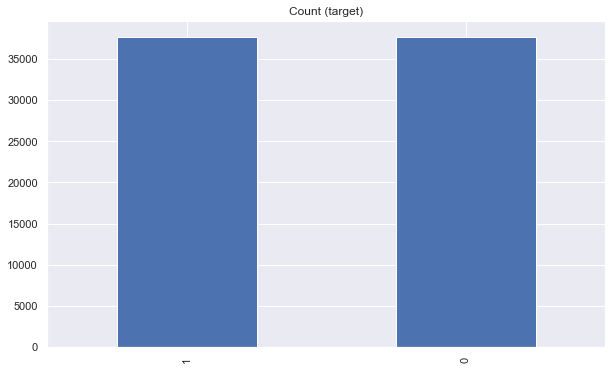

In [18]:
rf_class_1_over = rf_class_1.sample(count_class_0, replace=True)
rf_test_over = pd.concat([rf_class_0, rf_class_1_over], axis=0)

print('Random over-sampling:')
print(rf_test_over["drugs"].value_counts())

rf_test_over["drugs"].value_counts().plot(kind='bar', title='Count (target)');

In [19]:
X_rf_over = rf_test_over.loc[:, rf_test_over.columns != "drugs"]
y_rf_over = rf_test_over.loc[:, rf_test_over.columns=="drugs"]
X_rf_over_train, X_rf_over_test, y_rf_over_train, y_rf_over_test = train_test_split(X_rf_over, y_rf_over["drugs"], test_size=0.10, random_state=1)
model = RandomForestClassifier()
model.fit(X_rf_over_train, y_rf_over_train)
y_rf_over_preds = model.predict(X_rf_over_test)

In [ ]:
generate_model_report(y_rf_over_test, y_rf_over_preds)

In [ ]:
y_final_preds = model.predict(X_rf_test)
generate_model_report(y_rf_test, y_final_preds)

In [ ]:
def run_model(estimator, X, y):
    kf = KFold(n_splits=10, shuffle=True)
    
    acc = []
    f1 = []
    for train_idx, test_idx in kf.split(X):
        X_train = X[train_idx]
        y_train = y[train_idx]
         
        
        X_test = X[test_idx]
        y_test = y[test_idx]

        # data prep
        
        estimator.fit(X_train, y_train)
        y_preds = estimator.predict(X_test)
        acc.append(accuracy_score(y_test, y_preds))
        f1.append(f1_score(y_test, y_preds))
    
    generate_model_report(y_test, y_preds)
        
    plt.plot(range(0, 10), f1, label=estimator.__class__.__name__)

In [ ]:
# estimators = [RandomForestClassifier()]
estimators = [LogisticRegression(max_iter=1000), RandomForestClassifier(), GradientBoostingClassifier()]
for estimator in estimators:
    run_model(estimator, X_rf_over.values, Y_rf_over["drugs"].values)
    
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('# of Folds', fontsize=20)
plt.legend()

In [ ]:
model = GradientBoostingClassifier()
model.fit(X_rf_over_train, y_rf_over_train)
y_final_preds = model.predict(X_rf_test)
generate_model_report(y_rf_test, y_final_preds)

In [ ]:
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : model.feature_importances_},
                           index=X_rf.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')
plt.title('RF Feature Importances - MDI')

In [24]:
def generate_model_report(y_actual, y_predicted):
    print('Accuracy: %.3f' % accuracy_score(y_actual, y_predicted))
    print('Precision: %.3f' % precision_score(y_actual, y_predicted))
    print( 'Recall: %.3f' % recall_score(y_actual, y_predicted))
    print('F1 score: %.3f' % f1_score(y_actual, y_predicted))

In [27]:
from sklearn.model_selection import GridSearchCV

def display_default_and_gsearch_model_results(model_default, model_gridsearch, 
                                              X_test, y_test):
    '''
        Parameters: model_default: fit model using initial parameters
                    model_gridsearch: fit model using parameters from gridsearch
                    X_test: 2d numpy array
                    y_test: 1d numpy array
        Return: None, but prints out mse and r2 for the default and model with
                gridsearched parameters
    '''
    name = model_default.__class__.__name__.replace('Classifier', '') # for printing
    y_test_pred = model_gridsearch.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    print("Results for {0}".format(name))
    print("Gridsearched model acc: {:0.3f}".format(acc))
    y_test_pred = model_default.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    print("     Default model acc: {:0.3f}".format(acc))
    
    
    
def gridsearch_with_output(estimator, parameter_grid, X_train, y_train):
    '''
        Parameters: estimator: the type of model (e.g. RandomForestRegressor())
                    paramter_grid: dictionary defining the gridsearch parameters
                    X_train: 2d numpy array
                    y_train: 1d numpy array
        Returns:  best parameters and model fit with those parameters
    '''
    model_gridsearch = GridSearchCV(estimator,
                                    parameter_grid,
                                    n_jobs=-1,
                                    verbose=True,
                                    scoring='accuracy')
    model_gridsearch.fit(X_train, y_train)
    best_params = model_gridsearch.best_params_ 
    model_best = model_gridsearch.best_estimator_
    print("\nResult of gridsearch:")
    print("{0:<20s} | {1:<8s} | {2}".format("Parameter", "Optimal", "Gridsearch values"))
    print("-" * 55)
    for param, vals in parameter_grid.items():
        print("{0:<20s} | {1:<8s} | {2}".format(str(param), 
                                                str(best_params[param]),
                                                str(vals)))
    return best_params, model_best




In [25]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500, max_depth=2, random_state=1, max_features=1, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
gb.fit(X_rf_over_train, y_rf_over_train)
y_rf_over_preds = model.predict(X_rf_over_test)
generate_model_report(y_rf_over_test, y_rf_over_preds)




Accuracy: 0.696
Precision: 0.782
Recall: 0.545
F1 score: 0.643


In [26]:
y_final_preds = gb.predict(X_rf_test)
generate_model_report(y_rf_test, y_final_preds)

Accuracy: 0.789
Precision: 0.412
Recall: 0.549
F1 score: 0.471


In [28]:
rf = RandomForestClassifier()

In [30]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 20, 40, 80],
                      'random_state': [1]}
rf_best_params, rf_best_model = gridsearch_with_output(RandomForestClassifier(), 
                                                       random_forest_grid, 
                                                       X_rf_over_train, y_rf_over_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 26.2min



Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
max_depth            | None     | [3, None]
max_features         | sqrt     | ['sqrt', 'log2', None]
min_samples_split    | 2        | [2, 4]
min_samples_leaf     | 1        | [1, 2, 4]
bootstrap            | True     | [True, False]
n_estimators         | 10       | [10, 20, 40, 80]
random_state         | 1        | [1]


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 27.5min finished


In [36]:
rf = RandomForestClassifier(max_features="sqrt", min_samples_split=2, min_samples_leaf =1, bootstrap = True, n_estimators=10, random_state=1)

rf.fit(X_rf_over_train, y_rf_over_train)
y_rf_over_preds = model.predict(X_rf_over_test)
generate_model_report(y_rf_over_test, y_rf_over_preds)

Accuracy: 0.696
Precision: 0.782
Recall: 0.545
F1 score: 0.643


In [37]:
y_final_preds = rf.predict(X_rf_test)
generate_model_report(y_rf_test, y_final_preds)

Accuracy: 0.789
Precision: 0.412
Recall: 0.549
F1 score: 0.471
